# 0.0. Imports 


In [1]:
import pandas            as pd 
import numpy             as np 
import seaborn           as sns
import matplotlib.pyplot as plt
import datetime          as dt
import inflection  
import math
from IPython.display import Image



## 0.1. Helper Functions

## 0.2. Loading Data

In [2]:
df_sales_raw = pd.read_csv( 'data/train.csv', low_memory=False )
df_store_raw = pd.read_csv( 'data/store.csv', low_memory=False )

# Merge
df_raw = pd.merge( df_sales_raw, df_store_raw, how='left', on='Store' )

# 1.0. Data Description

In [3]:
df1 = df_raw.copy()

In [4]:
df1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

## 1.1. Rename Columns 

In [5]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
            'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
            'CompetitionDistance', 'CompetitionOpenSinceMonth',
            'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
            'Promo2SinceYear', 'PromoInterval']

snakecase = lambda x: inflection.underscore( x )

cols_new = list( map( snakecase, cols_old ) )

# Rename Columns 
df1.columns = cols_new 


In [6]:
df1.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

## 1.2. Data Dimension 

In [7]:
df1.shape

(1017209, 18)

## 1.3. Data Types

In [8]:
df1['date'] = pd.to_datetime( df1['date'] )
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4. Check NA

In [9]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5. Fillout NA

In [10]:
df1['competition_distance'].max()

75860.0

In [11]:
df1.sample()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
225299,70,6,2015-01-10,5869,571,1,0,0,0,c,c,4840.0,NaN,NaN,0,NaN,NaN,NaN


In [12]:
#competition_distance
df1['competition_distance'] = df1['competition_distance'].apply( lambda x: 200000.0 if math.isnan( x ) else x )

#competition_open_since_month
df1['competition_open_since_month'] = df1.apply( lambda x: x['date'].month if math.isnan( x['competition_open_since_month'] ) else x['competition_open_since_month'], axis=1 )

#competition_open_since_year
df1['competition_open_since_year'] = df1.apply( lambda x: x['date'].year if math.isnan( x['competition_open_since_year'] ) else x['competition_open_since_year'], axis=1 )
     
#promo2_since_week
df1['promo2_since_week'] = df1.apply( lambda x: x['date'].week if math.isnan( x['promo2_since_week'] ) else x['promo2_since_week'], axis=1 )

# promo2_since_year
df1['promo2_since_year'] = df1.apply( lambda x: x['date'].year if math.isnan( x['promo2_since_year'] ) else x['promo2_since_year'], axis=1 )

#promo_interval
month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'Mai', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'} 
df1['promo_interval'].fillna( 0, inplace=True )
df1['month_map'] = df1['date'].dt.month.map( month_map )

df1['is_promo'] = df1[['promo_interval', 'month_map']].apply( lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split( ',' ) else 0, axis=1 ) 



In [13]:
df1.isna().sum()



store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

## 1.6. Change Dtypes

In [14]:
df1['competition_open_since_month'] =  df1['competition_open_since_month'].astype( int )
df1['competition_open_since_year'] =  df1['competition_open_since_year'].astype( int )

df1['promo2_since_week'] =  df1['promo2_since_week'].astype( int )
df1['promo2_since_year'] =  df1['promo2_since_year'].astype( int )



## 1.7. Descriptive Statistical 

In [15]:
num_attributes =  df1.select_dtypes( include=['int64', 'float64'] )
cat_attributes =  df1.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

### 1.7.1 Numerical Attributes

In [16]:
# Central Tendency - mean, median 
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# Concatenate
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()

m.columns = [ 'attributes', 'min', 'max','range','mean', 'median', 'std', 'skew', 'kurtosis']





In [17]:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


### 1.7.2. Categorical Attributes

In [18]:
cat_attributes.apply( lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

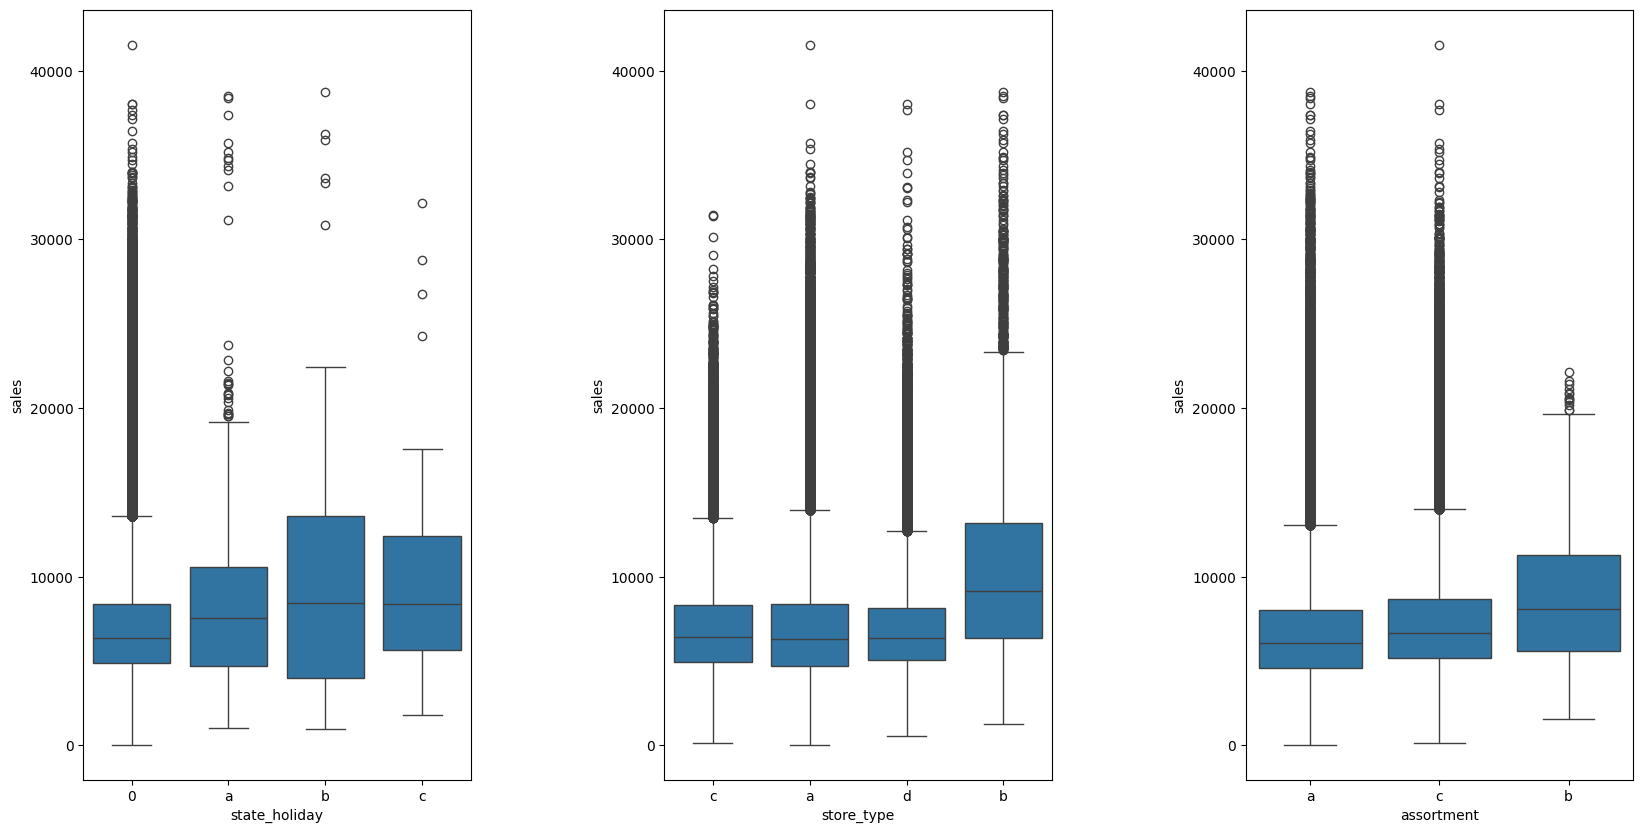

In [19]:
aux1 = df1[( df1['state_holiday'] != 0 ) & ( df1['sales'] > 0 ) ]

plt.figure(figsize=(20, 10))

plt.subplot( 1, 3, 1 )
sns.boxplot( x='state_holiday', y='sales', data=aux1 )

plt.subplot( 1, 3, 2 )
sns.boxplot( x='store_type', y='sales', data=aux1 )

plt.subplot( 1, 3, 3 )
sns.boxplot( x='assortment', y='sales', data=aux1 )

# Ajustando o espaçamento entre os subplots
plt.subplots_adjust(wspace=0.5)

plt.show()



# 2.0. Feature Engineering 

In [20]:
df2 = df1.copy()

## 2.1. Mental Map Hypothesis 

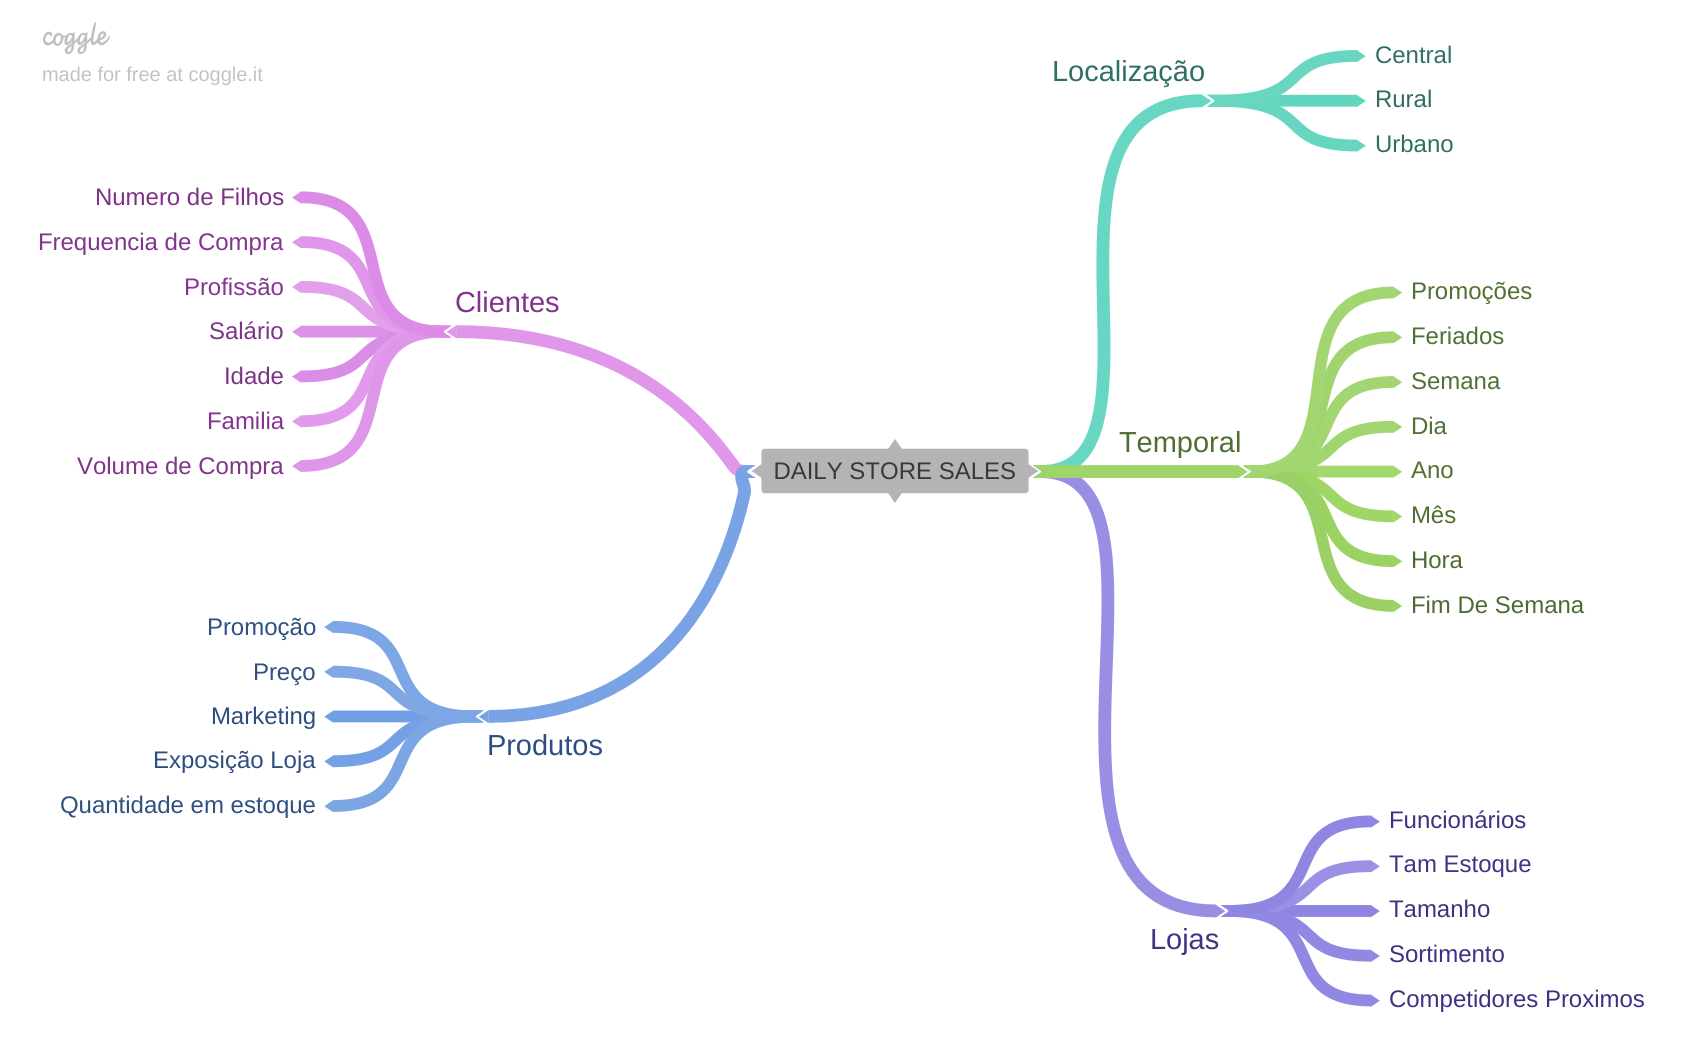

In [21]:
Image( 'img/MindMapHip.png' )

## 2.1. Hypothesis Creation 

### 2.1.1. Store Hypothesis 

**1.** Lojas com maior quadro de funcionários, deveriam vender mais. 

**2.** Lojas com estoque maior, deveriam vender mais. 

**3.** Lojas com porte maior, deveriam vender mais. 

**4.** Lojas com maior sortimento de produtos, deveriam vender mais.

**5.** Lojas com concorrentes mais proximos deveriam vender menos

**6.** Lojas com concorrentes a mais tempo deveriam vender mais.

### 2.1.2. Product Hypothesis 

**1.** Lojas que tem mais investimento em Marketing, deveriam vender mais. 

**2.** Lojas que expoem mais produtos nas vitrines, deveriam vender mais. 

**3.** Lojas que possuem o melhor preço, deveriam vender mais. 

**4.** Lojas que possuem o preço baixo por mais tempo, deveriam vender mais.

**5.** Lojas com mais dias de promoção deveriam vender mais.

**6.** Lojas com mais promoções consecutivas deveriam vender mais.




### 2.1.3. Time Hypothesis 

**1.** lojas abertas durante o feriado de natal deveriam vender mais.

**2.** Lojas deveriam vender mais ao longo dos anos. 

**3.** Lojas deveriam vender mais no segundo semestre do ano. 

**4.** Lojas Deveriam vender mais depois do dia 10 de cada mês

**5.** Lojas Deveriam vender menos aos finais de semana.

**6.** Lojas deveriam vender menos durante os feriados escoalres.

## 2.2. Final Hipóthesis List

**1.** Lojas com maior sortimento de produtos, deveriam vender mais.

**2.** Lojas com concorrentes mais proximos deveriam vender menos

**3.** Lojas com concorrentes a mais tempo deveriam vender mais.

**4.** Lojas que possuem o preço baixo por mais tempo, deveriam vender mais.

**5.** Lojas com mais dias de promoção deveriam vender mais.

**6.** Lojas com mais promoções consecutivas deveriam vender mais.

**7.** lojas abertas durante o feriado de natal deveriam vender mais.

**8.** Lojas deveriam vender mais ao longo dos anos. 

**9.** Lojas deveriam vender mais no segundo semestre do ano. 

**10.** Lojas Deveriam vender mais depois do dia 10 de cada mês

**11.** Lojas Deveriam vender menos aos finais de semana.

**12.** Lojas deveriam vender menos durante os feriados escoalres.

## 2.3. Feature Engineering 

In [22]:
# Year
df2['year'] = df2['date'].dt.year

# Month
df2['month'] = df2['date'].dt.month

# Day
df2['day'] = df2['date'].dt.day

# Week Of Year
df2['week_of_year'] = df2['date'].dt.isocalendar().week

# Year Week
df2['year_week'] = df2['date'].dt.strftime( '%Y-%W')

# Competition Since
df2['competition_since'] = df2.apply( lambda x: dt.datetime( year=x['competition_open_since_year'], month=x['competition_open_since_month'], day=1 ), axis=1 )
df2['competition_time_month'] = ( ( df2['date'] - df2['competition_since'] ) /30 ).apply( lambda x: x.days ).astype( int )

# Promo Since
df2['promo_since'] = df2['promo2_since_year'].astype( str ) + '-' + df2['promo2_since_week'].astype( str )
df2['promo_since'] = df2['promo_since'].apply( lambda x: dt.datetime.strptime( x + '-1', '%Y-%W-%w' ) - dt.timedelta( days=7 ) )
df2['promo_time_week'] = ( ( df2['date'] - df2['promo_since'] ) /7 ).apply( lambda x: x.days ).astype( int )

# Assortment
df2['assortment'] = df2['assortment'].apply( lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended' )

# State Holiday
df2['state_holiday'] = df2['state_holiday'].apply( lambda x: 'public_holiday' if x == 'a' else 'easter_holiday' if x == 'b' else 'Christmas' if x == 'c' else 'regular_day' ) 




In [23]:
df2.head().T

,0,1,2,3,4
store,1,2,3,4,5
day_of_week,5,5,5,5,5
date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
sales,5263,6064,8314,13995,4822
customers,555,625,821,1498,559
open,1,1,1,1,1
promo,1,1,1,1,1
state_holiday,regular_day,regular_day,regular_day,regular_day,regular_day
school_holiday,1,1,1,1,1
store_type,c,a,a,c,a


# 3.0. Variable Filtering 

In [24]:
df3 = df2.copy()
df3.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,...,is_promo,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week
0,1,5,2015-07-31,5263,555,1,1,regular_day,1,c,...,0,2015,7,31,31,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,625,1,1,regular_day,1,a,...,1,2015,7,31,31,2015-30,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,821,1,1,regular_day,1,a,...,1,2015,7,31,31,2015-30,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1498,1,1,regular_day,1,c,...,0,2015,7,31,31,2015-30,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,559,1,1,regular_day,1,a,...,0,2015,7,31,31,2015-30,2015-04-01,4,2015-07-27,0


## 3.1. Line Filtering 

In [25]:
df3 = df3[ ( df3['open'] != 0 ) & ( df3['sales'] > 0 ) ] 

## 3.2. Columns Filtering 

In [26]:
cols_drop = ['customers', 'open', 'promo_interval', 'month_map'] 
df3 = df3.drop(cols_drop, axis=1)

In [27]:
df3.columns 

Index(['store', 'day_of_week', 'date', 'sales', 'promo', 'state_holiday',
       'school_holiday', 'store_type', 'assortment', 'competition_distance',
       'competition_open_since_month', 'competition_open_since_year', 'promo2',
       'promo2_since_week', 'promo2_since_year', 'is_promo', 'year', 'month',
       'day', 'week_of_year', 'year_week', 'competition_since',
       'competition_time_month', 'promo_since', 'promo_time_week'],
      dtype='object')

# 4.0. Exploratory Data Analysis 

In [28]:
df4 = df3.copy()

## 4.1. Univariate Analysis 

### 4.1.1. Response Variable

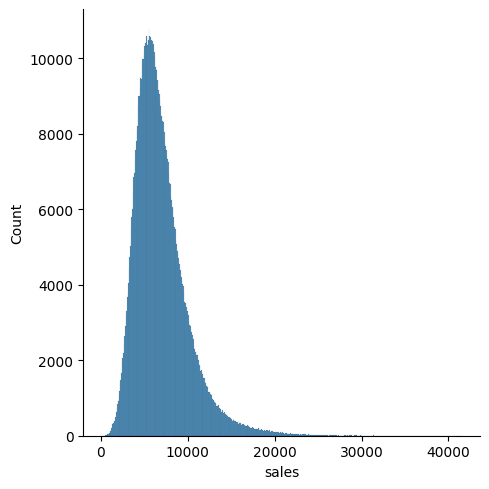

In [29]:
sns.displot( df4['sales'] )

### 4.1.2. Numerical Variables

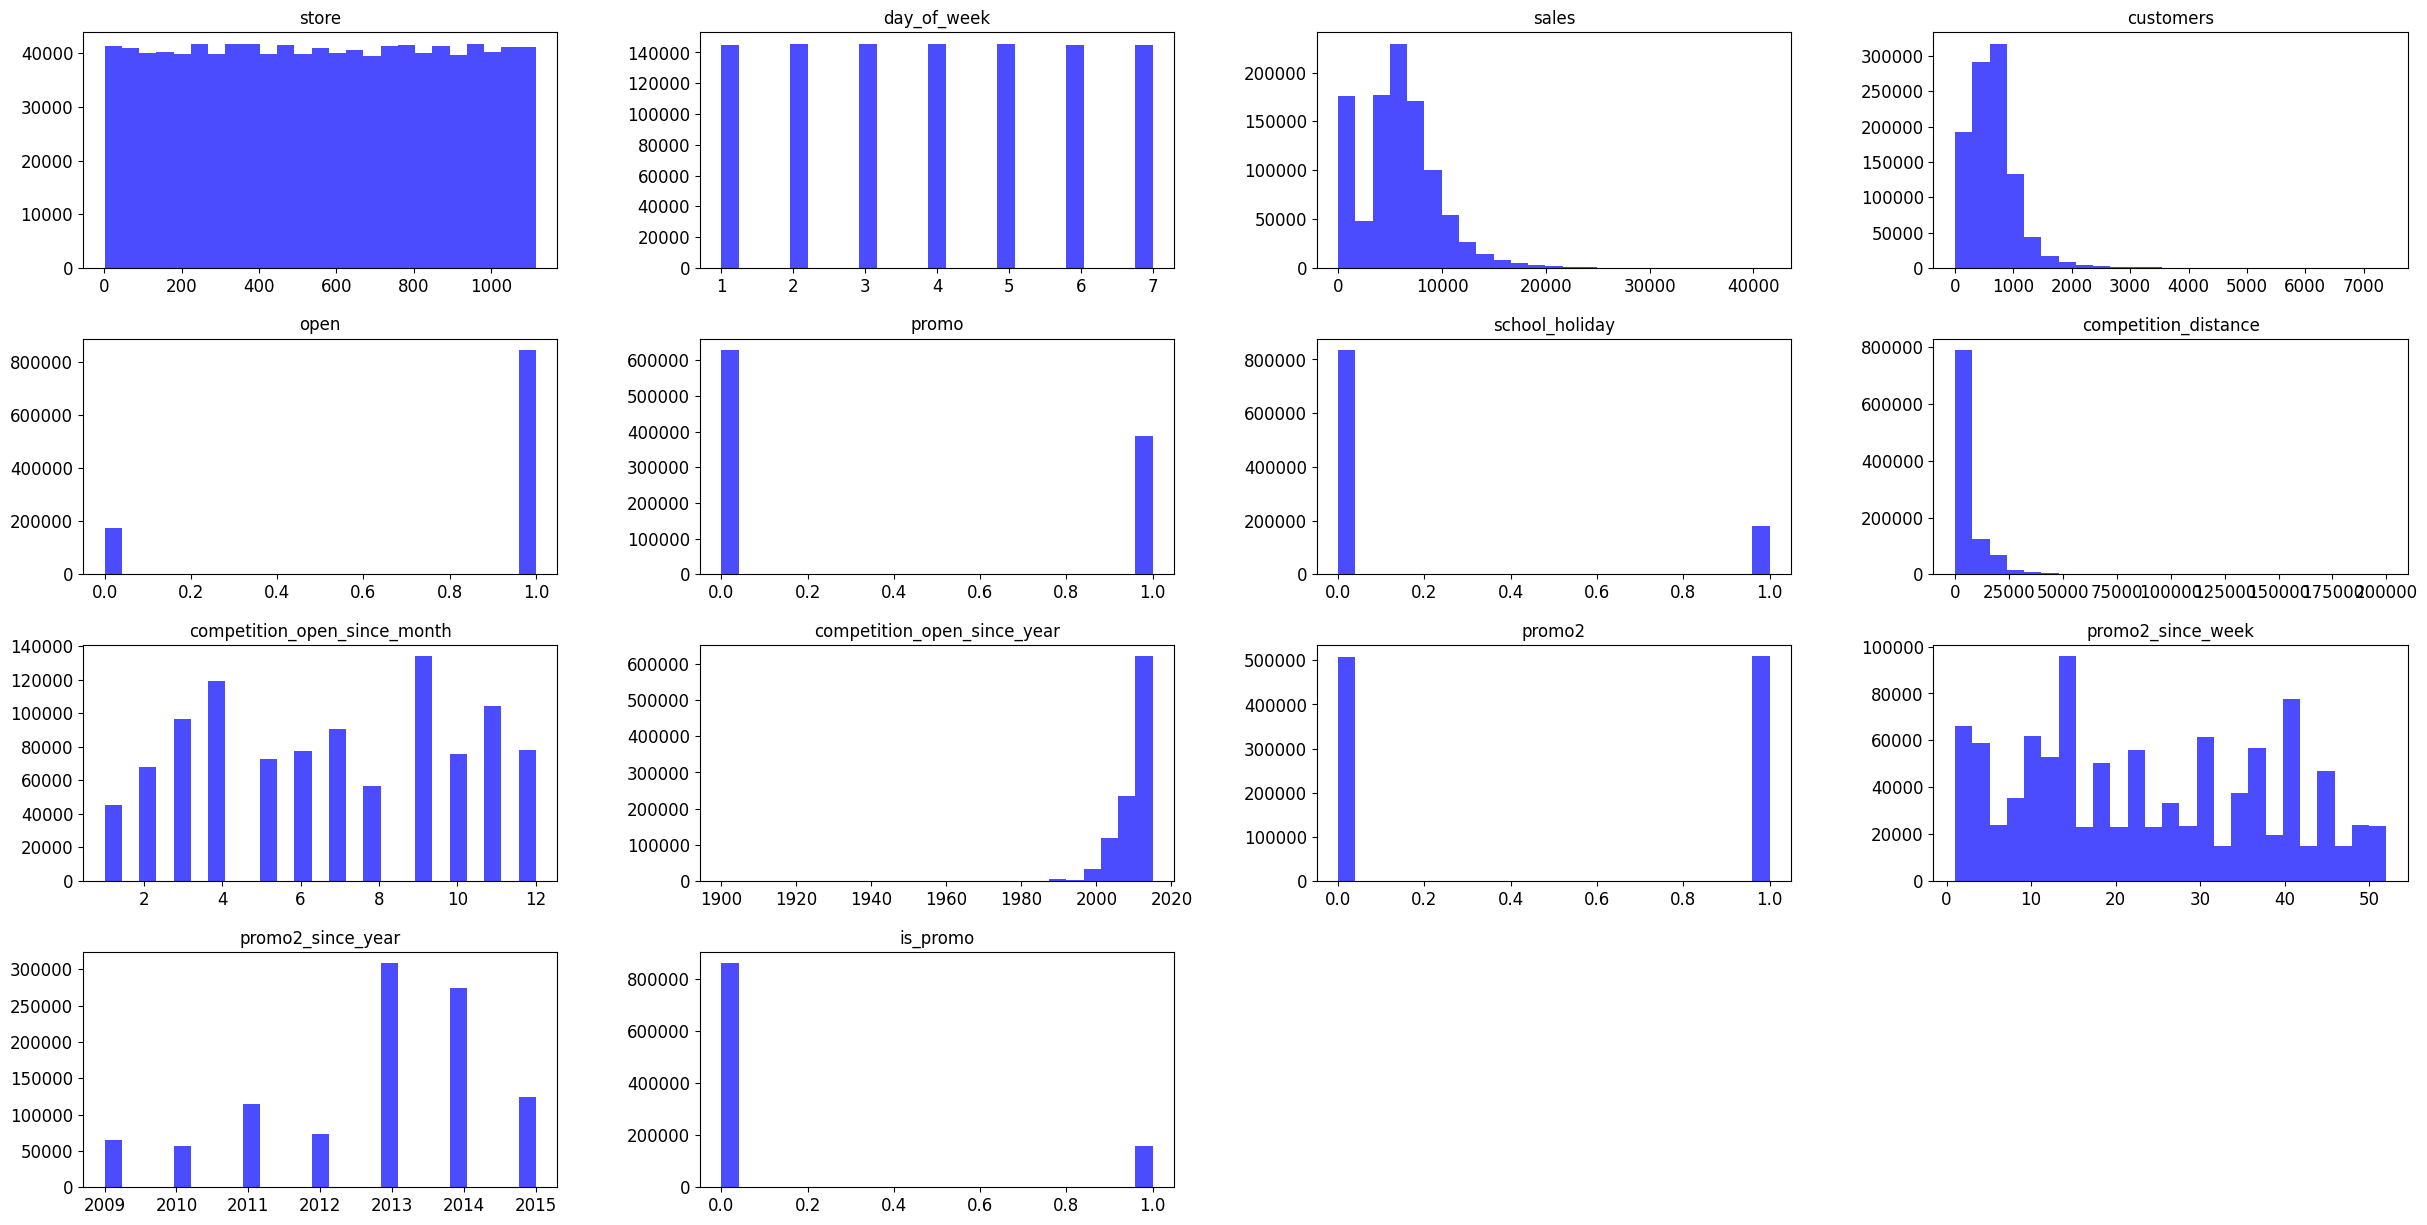

In [30]:
num_attributes.hist(bins=25, figsize=(30, 15), grid=False, xlabelsize=12, ylabelsize=12, alpha=0.7, color='blue')
plt.title("Histograma para Variáveis Numéricas", size=16)
plt.show()

### 4.1.3. Categorical Variables 

In [31]:
cat_attributes.head()

,state_holiday,store_type,assortment,promo_interval,month_map
0,0,c,a,0,Jul
1,0,a,a,"Jan,Apr,Jul,Oct",Jul
2,0,a,a,"Jan,Apr,Jul,Oct",Jul
3,0,c,c,0,Jul
4,0,a,a,0,Jul


In [32]:
df4['state_holiday'].drop_duplicates()

0            regular_day
63559     public_holiday
129424    easter_holiday
241126         Christmas
Name: state_holiday, dtype: object

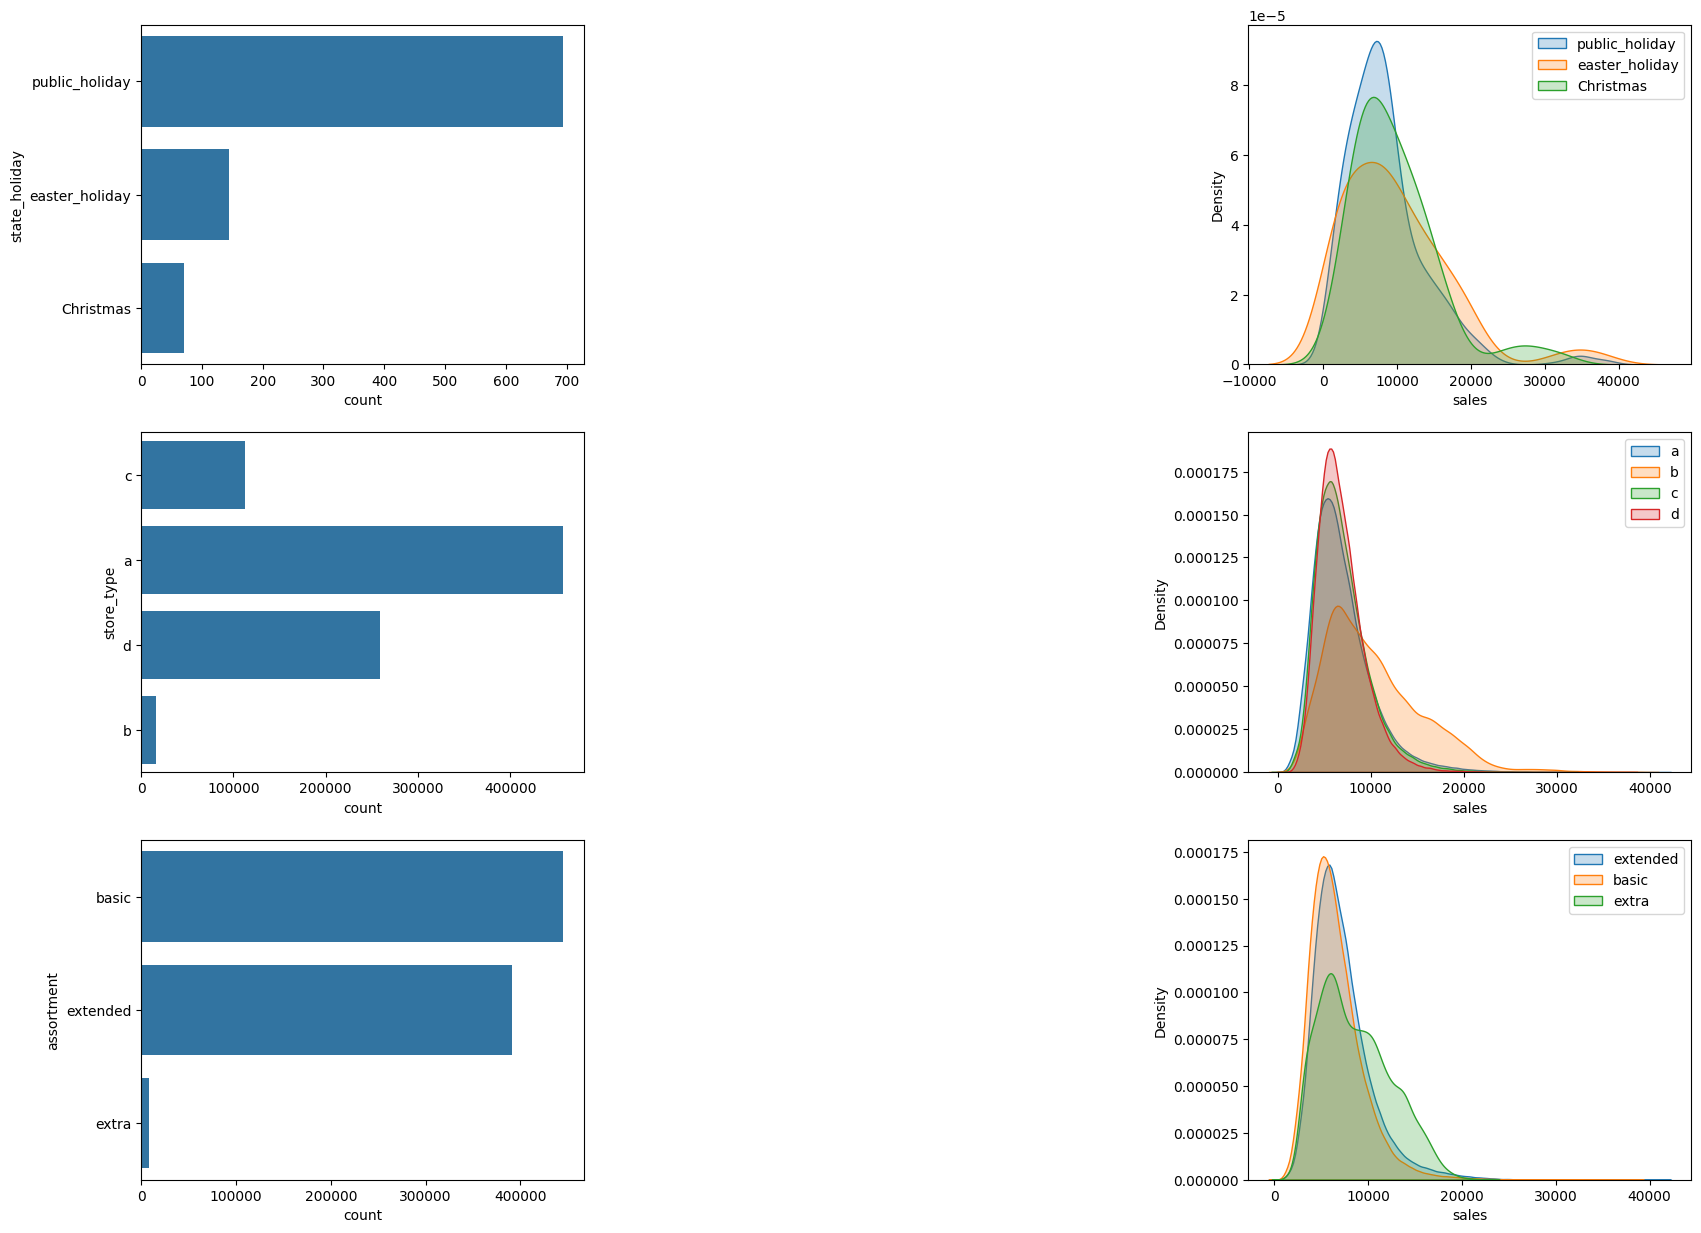

In [48]:
# Setando o tamanho do grafico
fig, axes = plt.subplots(3, 2, figsize=(20, 15))

# Ajustar a largura entre os subplots
plt.subplots_adjust(wspace=1.5)

# state_holiday
plt.subplot( 3, 2, 1 )
a = df4[df4['state_holiday'] != 'regular_day']
sns.countplot( a['state_holiday'], ax=axes[0, 0] )

plt.subplot( 3, 2, 2 )
sns.kdeplot( df4[df4['state_holiday'] == 'public_holiday'] ['sales'], label='public_holiday', fill=True, ax=axes[0, 1] )
sns.kdeplot( df4[df4['state_holiday'] == 'easter_holiday'] ['sales'], label='easter_holiday', fill=True, ax=axes[0, 1] )
sns.kdeplot( df4[df4['state_holiday'] == 'Christmas'] ['sales'], label='Christmas', fill=True, ax=axes[0, 1] )

axes[0, 1].legend()


# store_type
plt.subplot( 3, 2, 3 )
sns.countplot( df4['store_type'], ax=axes[1, 0] ) 

plt.subplot( 3, 2, 4 )
sns.kdeplot( df4[df4['store_type'] == 'a'] ['sales'], label='a', fill=True, ax=axes[1, 1] )
sns.kdeplot( df4[df4['store_type'] == 'b'] ['sales'], label='b', fill=True, ax=axes[1, 1] )
sns.kdeplot( df4[df4['store_type'] == 'c'] ['sales'], label='c', fill=True, ax=axes[1, 1] )
sns.kdeplot( df4[df4['store_type'] == 'd'] ['sales'], label='d', fill=True, ax=axes[1, 1] )

axes[1, 1].legend()


# assortment
plt.subplot( 3, 2, 5 )
sns.countplot( df4['assortment'], ax=axes[2, 0] ) 

plt.subplot( 3, 2, 6 )
sns.kdeplot( df4[df4['assortment'] == 'extended'] ['sales'], label='extended', fill=True, ax=axes[2, 1],  )
sns.kdeplot( df4[df4['assortment'] == 'basic'] ['sales'], label='basic', fill=True, ax=axes[2, 1] )
sns.kdeplot( df4[df4['assortment'] == 'extra'] ['sales'], label='extra', fill=True, ax=axes[2, 1] )


axes[2, 1].legend()

plt.show()

## 4.2. Bivariate Analysis

### **H1.** Lojas com maior sortimento de produtos, deveriam vender mais.

- **Hipótese Falsa**: Conforme constatado em analise explroatória, lojas com maior sortimento vendem menos 



<Axes: xlabel='year_week'>

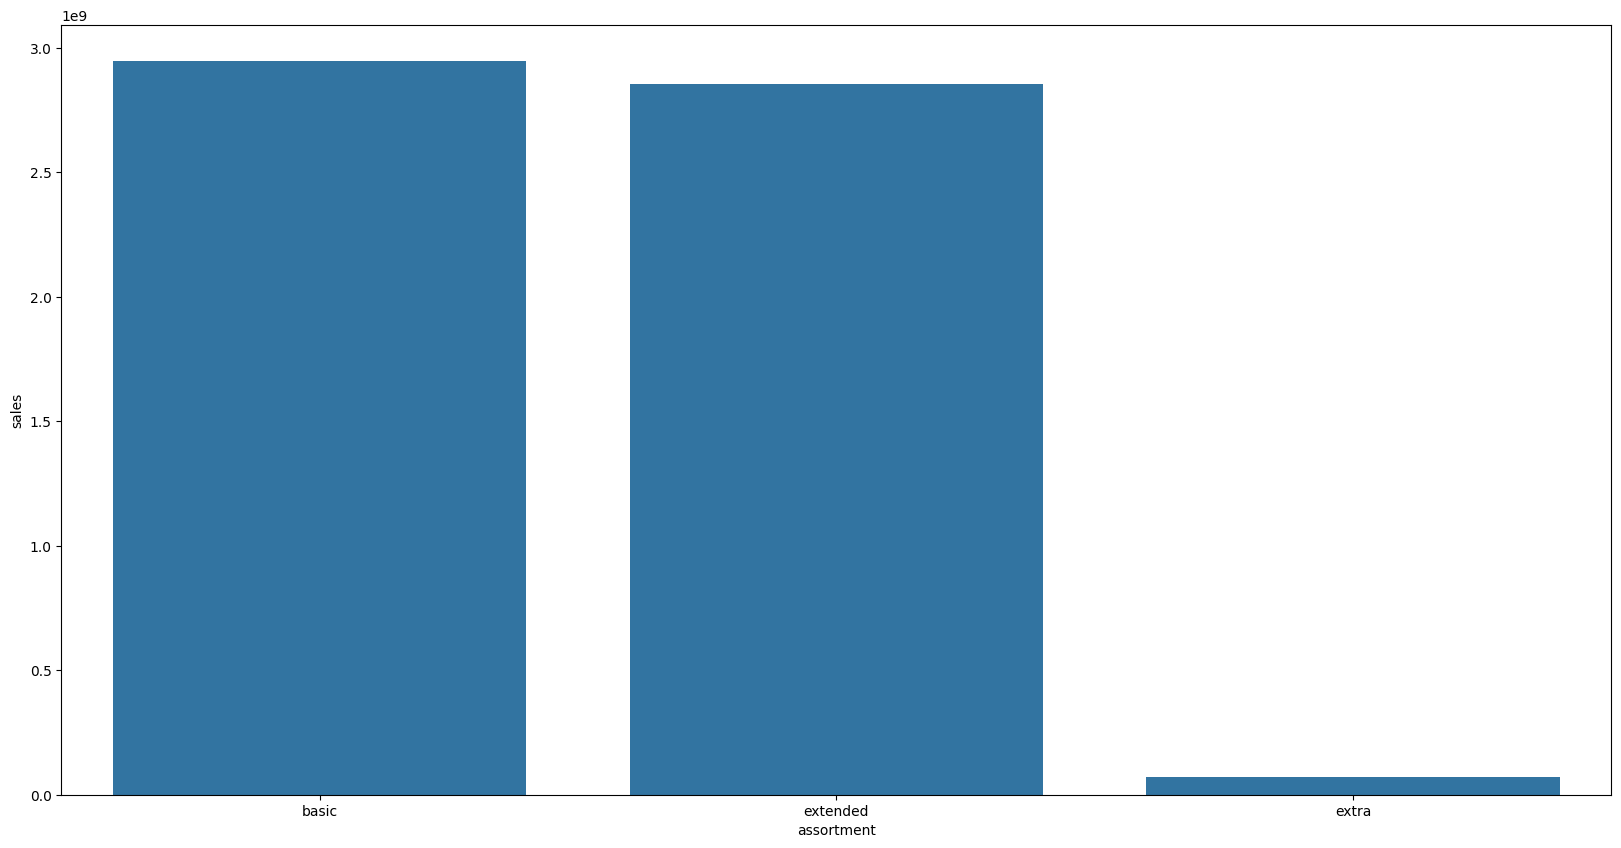

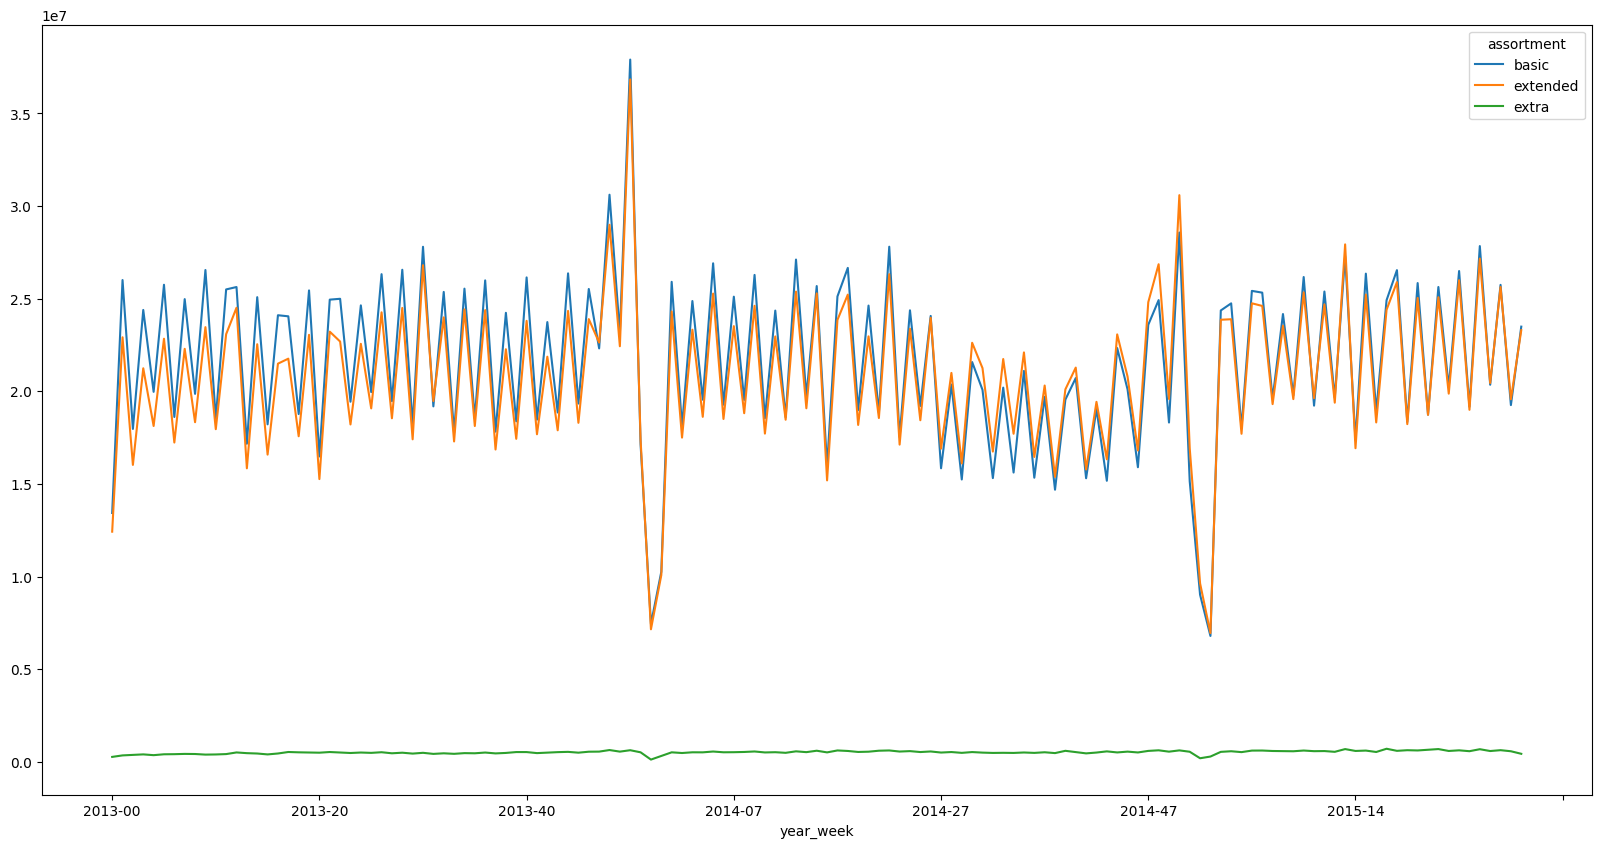

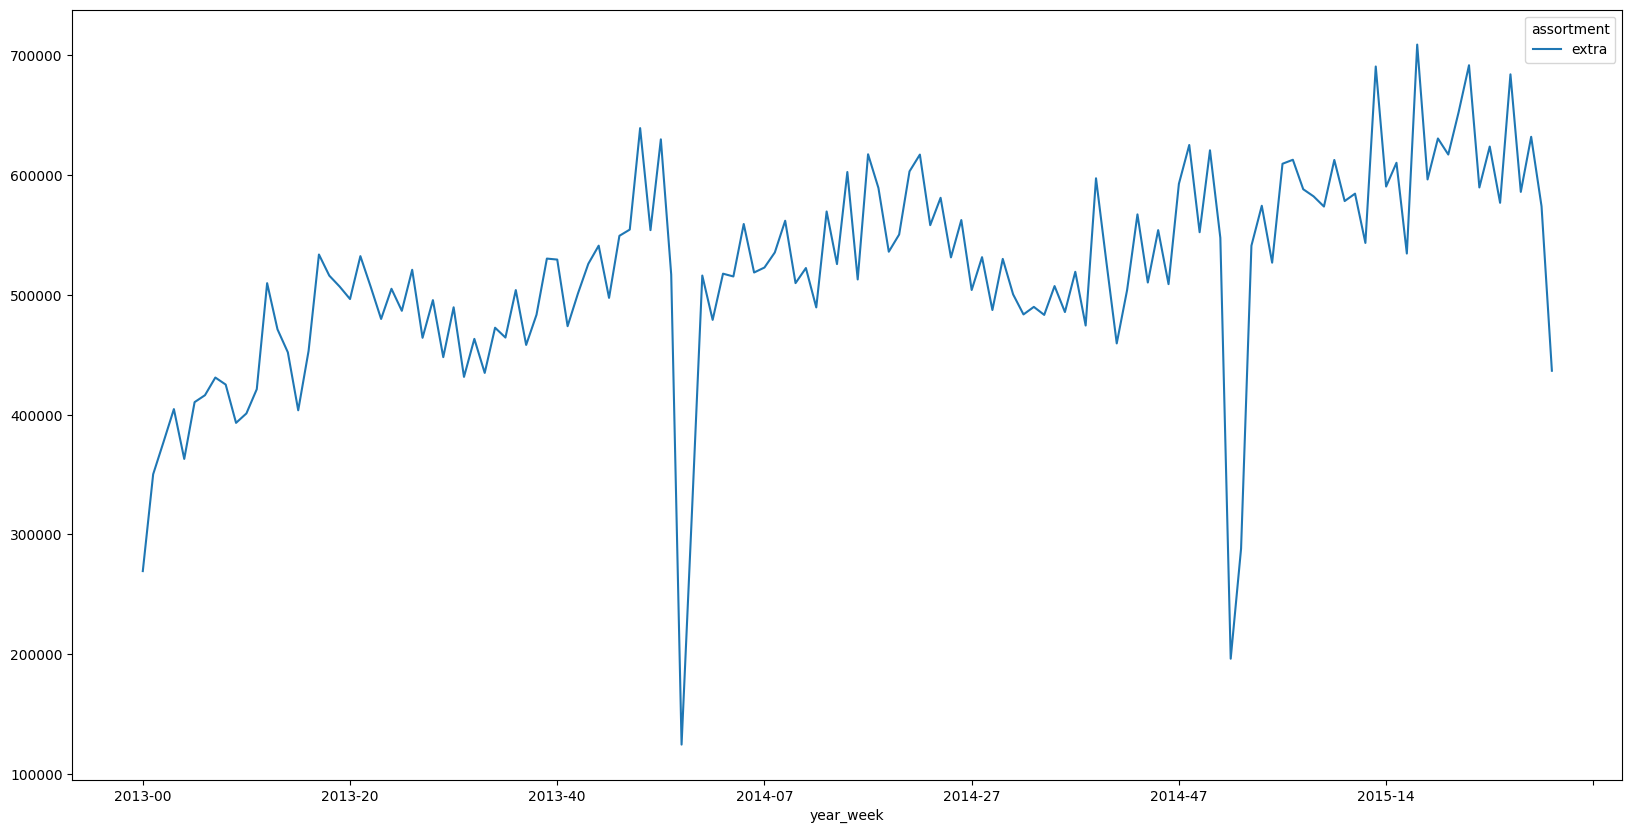

In [57]:
plt.figure(figsize=( 20, 10) )
aux1 = df4[['assortment', 'sales']].groupby( 'assortment' ).sum().reset_index()
sns.barplot( x='assortment', y='sales', data=aux1 );

# Fazendo a comparação de vendas baseado nos anos/semanas
aux2 = df4[['year_week','assortment', 'sales']].groupby( ['year_week','assortment'] ).sum().reset_index()
aux2.pivot( index= 'year_week', columns='assortment', values='sales' ).plot( figsize=(20, 10) )

# Plotando o assortment tipo extra para verificar se existe alguma linearidade em seu comportamento 
aux3 = aux2[aux2['assortment'] == 'extra']
aux3.pivot( index= 'year_week', columns='assortment', values='sales' ).plot( figsize=(20, 10) )


### **H2.** Lojas com concorrentes mais proximos deveriam vender menos
- **Hipótese Falsa**: Lojas com competidores mais proximos vendem mais



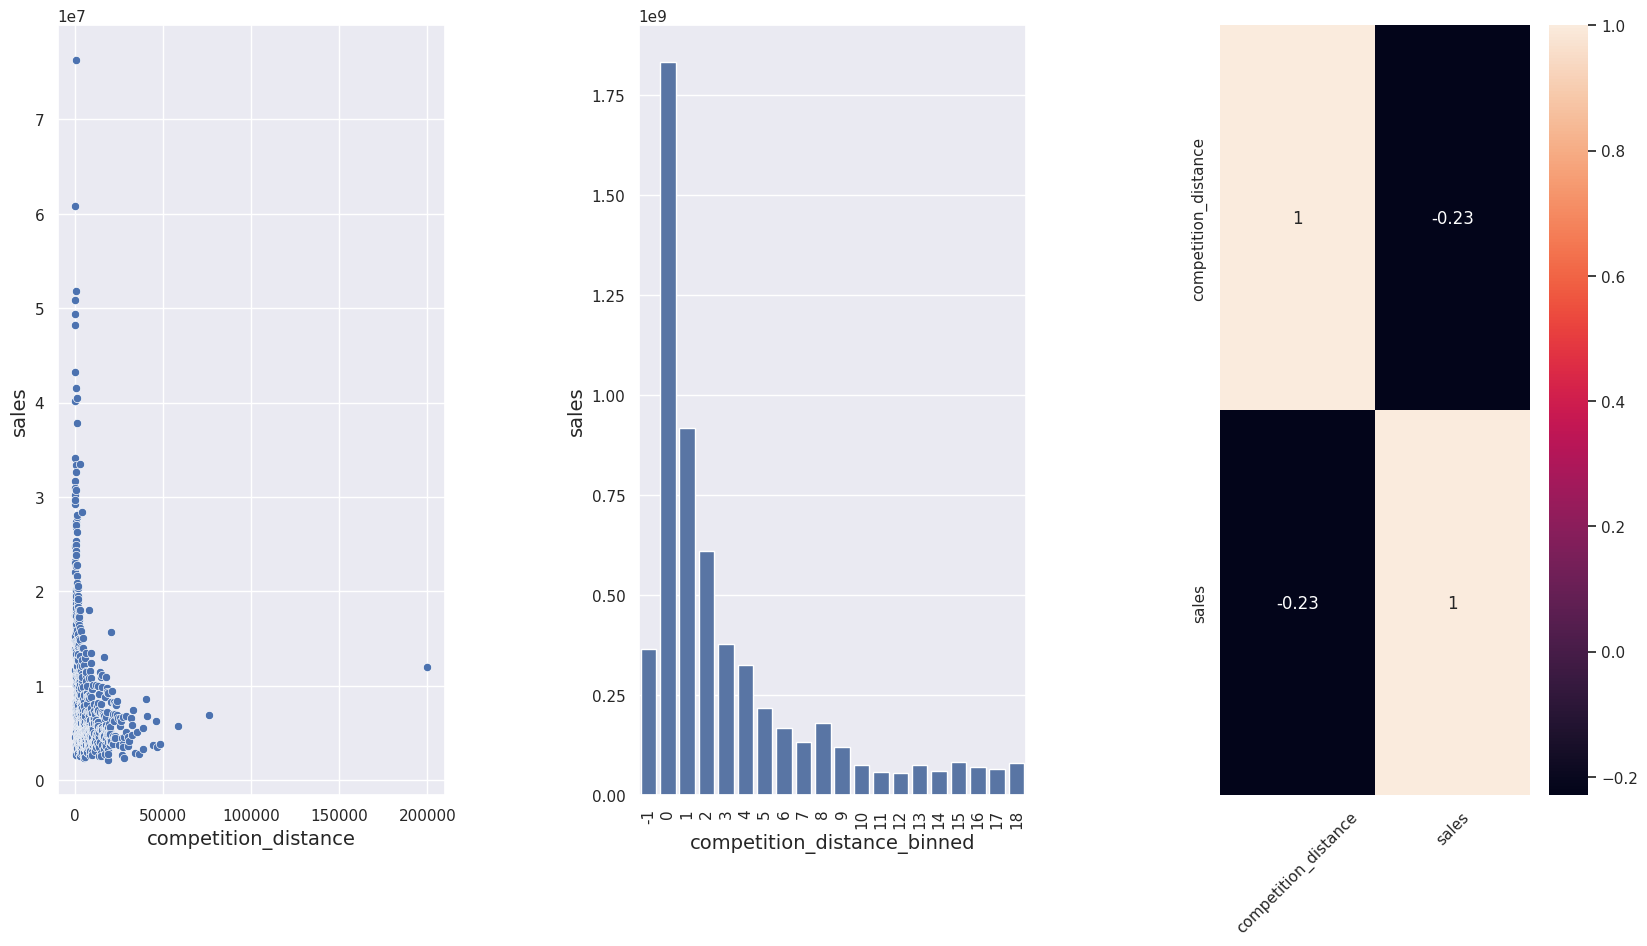

In [139]:
aux1 = df4[['competition_distance', 'sales']].groupby( 'competition_distance').sum().reset_index()

# Criando a figura e os eixos
fig, axes = plt.subplots(1, 3, figsize=(20, 10))

plt.subplot( 1, 3, 1 )
sns.scatterplot( x='competition_distance', y='sales', data=aux1, ax=axes[0] );

# Plotando o Bar Chart
plt.subplot( 1, 3, 2 )
bins = list( np.arange( 0, 20000, 1000) )
#aux2['competition_distance_binned'] = pd.cut(aux2.index, bins=bins, right=False)
aux1['competition_distance_binned'] = pd.cut( aux1['competition_distance'], bins=bins ).cat.codes
aux2 = aux1[['competition_distance_binned', 'sales']].groupby( 'competition_distance_binned').sum().reset_index()
sns.barplot( x='competition_distance_binned', y='sales', data=aux2 );
plt.xticks(rotation=90)

# Plotando um Heat Map
plt.subplot( 1, 3, 3 )
sns.heatmap(aux1[['competition_distance', 'sales']].corr(method='pearson'), annot=True, ax=axes[2])



plt.xticks(rotation=45)  # Gire as labels do eixo x em 45 graus
plt.subplots_adjust(wspace=0.5)
plt.show()


### **H3.** Lojas com concorrentes a mais tempo deveriam vender mais.
- **Hipótese Falsa:** Lojas com competidores a mais tmepo vendem menos.

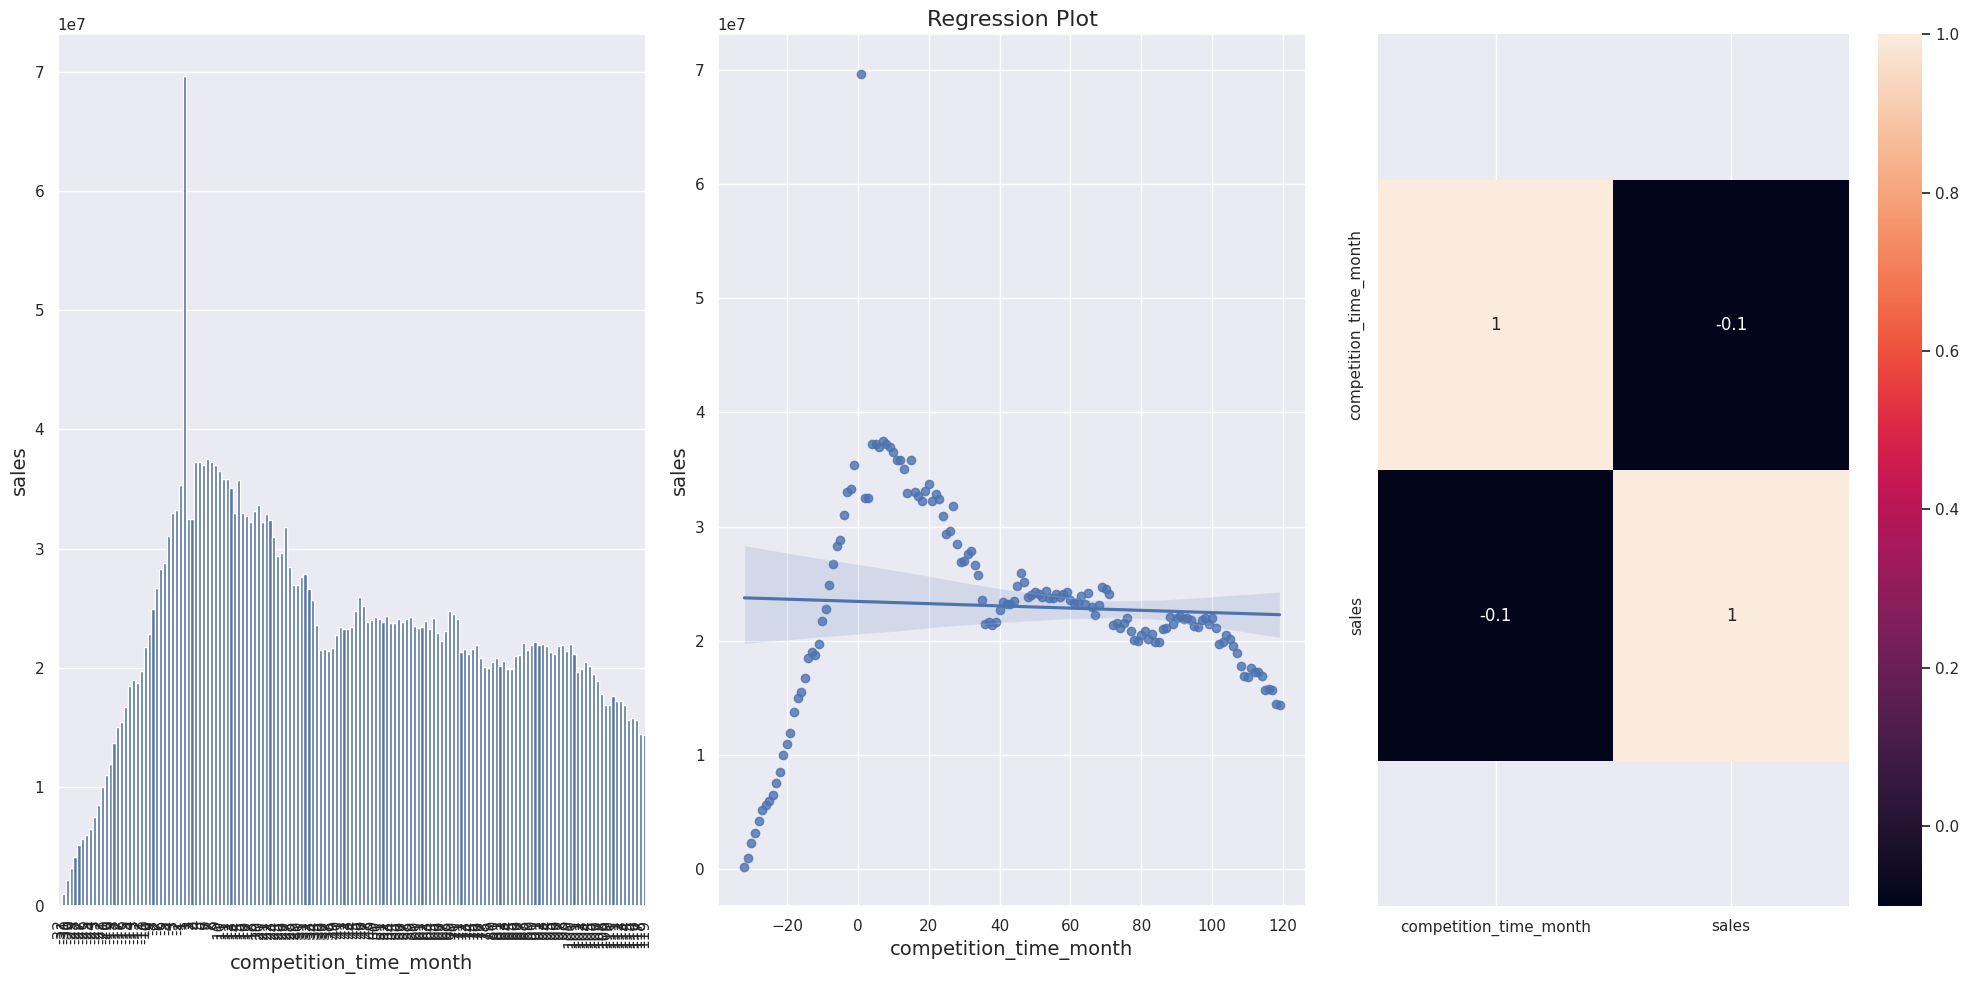

In [138]:
# Ajustando o tamanho das plotagens
plt.figure(figsize=(20, 10))

# Bar Chart
plt.subplot( 1,3,1)
aux1 = df4[['competition_time_month', 'sales']].groupby('competition_time_month').sum().reset_index()
aux2 = aux1[( aux1['competition_time_month'] < 120 ) & ( aux1['competition_time_month'] != 0 )] 
sns.barplot(x='competition_time_month', y='sales', data=aux2 );
plt.xticks( rotation=90 );

# Regression Plot
plt.subplot( 1, 3, 2)
sns.regplot(x='competition_time_month', y='sales', data=aux2 );
plt.title('Regression Plot')

# Heat Map 
plt.subplot( 1, 3, 3 )
x = sns.heatmap( aux1.corr( method='pearson'), annot=True )
bottom, top = x.get_ylim()
x.set_ylim( bottom+0.5, top-0.5 );

plt.tight_layout()
plt.show()



## 4.3. Multivariate analysis